# Intro

PROMPT: As a group, you will formulate a hypothesis as to whether or not these factors have any affect on the changes in crime rates for the neighborhoods and citywide that you identified in project #1. I am interested in learning whether these factors have any relationship to the change in crime for these neighborhoods and is it a positive or negative correlation (i.e. the number of vacant notices increased and so did the crime or did increased rat-rub outs happen in neighborhoods that had a decrease in crime?). Were the results as you expected or were they unexpected? Out of the three factors, did one type have more or less impact vs the others? To answer these questions I am looking for the following, but do not feel limited by them.

1) You will need to summarize the counts by neighborhood for 2017 and 2022 to identify if there has been an increase or decrease that correlates to the change in crime.

2) You will then need to select the proper hypothesis testing method (T-test, Chi-Squared, Fischers, etc) and then create the code and run the test and interpret the results.

3) You will then summarize your results and based on these results determine whether or not you should accept or reject your hypothesis.

4) You will need to create the proper visualizations (plots, line graphs, bar charts, histographs, etc) for your data sets and analysis.

5) Create a visualization by year that shows how these factors have changed (by count or percentage) citywide over the years in comparison to the change of crime rate by year. Your visualization should visualize each factor by year compared to the citywide change.

Top Neighborhoods: FRANKFORD, DOWNTOWN, UPTON, EAST BALTIMORE MIDWAY, ELLWOOD PARK/MONUMENT

Bottom Neighborhoods: MOUNT VERNON, BROADWAY EAST, SANDTOWN-WINCHESTER, BALTIMORE HIGHLANDS, BROOKLYN

Joseph James Gun Offender Registry: https://arcg.is/1K9fDH

Luis Nasim Hari Vacant Building Notices: https://arcg.is/

Aditya Kushal Soumitra BPD Arrests: https://arcg.is/0SLeza0

Each group will do their own analysis and visualization on this google collab and then do their part of the report on the word doc.

We also need the table with the top/bottom neighborhood crime rate to check the correlation of our factors. I am going to put mine here so we have the exact same counts

In [15]:
#values gotten from project 1
import pandas as pd

inc_5 = ['Frankford', 'Downtown', 'Upton', 'East Baltimore Midway', 'Ellwood Park/Monument']
dec_5 = ['Mount Vernon', 'Broadway East', 'Sandtown-Winchester', 'Baltimore Highlands', 'Brooklyn']

top_crime = {
    '2017': [121, 158, 124, 63, 58],
    '2018': [147, 207, 116, 68, 90],
    '2019': [166, 211, 147, 110, 67],
    '2020': [169, 188, 94, 77, 78],
    '2021': [148, 202, 144, 86, 77],
    '2022': [218, 221, 174, 97, 89]
}

top_crime_df = pd.DataFrame(top_crime, index=inc_5)
print(top_crime_df)
print("\n")

bot_crime = {
    '2017': [68, 115, 207, 81, 226],
    '2018': [64, 117, 155, 63, 137],
    '2019': [58, 111, 147, 56, 163],
    '2020': [61, 91, 171, 43, 139],
    '2021': [52, 151, 155, 76, 128],
    '2022': [41, 87, 167, 40, 178]
}

bot_crime_df = pd.DataFrame(bot_crime, index=dec_5)
print(bot_crime_df)

                       2017  2018  2019  2020  2021  2022
Frankford               121   147   166   169   148   218
Downtown                158   207   211   188   202   221
Upton                   124   116   147    94   144   174
East Baltimore Midway    63    68   110    77    86    97
Ellwood Park/Monument    58    90    67    78    77    89


                     2017  2018  2019  2020  2021  2022
Mount Vernon           68    64    58    61    52    41
Broadway East         115   117   111    91   151    87
Sandtown-Winchester   207   155   147   171   155   167
Baltimore Highlands    81    63    56    43    76    40
Brooklyn              226   137   163   139   128   178


#**Vacant Building Notices By, Luis, Nasim, Hari : https://arcg.is/**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vacant_df=pd.read_csv('https://github.com/naalemi/Projecsts/raw/main/Vacant_Building_Notices.csv')
vacant_df

,X,Y,OBJECTID,NoticeNum,DateNotice,DateCancel,DateAbate,NT,OWNER_ABBR,HousingMarketTypology2017,Council_District,Neighborhood,BLOCKLOT,Address
0,1.411074e+06,598468.355480,723192,805231A,2012/01/25 15:37:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 003,2041 W NORTH AVE
1,1.411088e+06,598469.087434,723193,1780434A,2019/04/20 08:55:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 004,2039 W NORTH AVE
2,1.411131e+06,598471.043467,723196,927919A,2013/02/01 14:19:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 007,2033 W NORTH AVE
3,1.411144e+06,598471.677324,723197,2106499A,2022/05/13 16:20:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 008,2031 W NORTH AVE
4,1.411214e+06,598474.912882,723202,2078873A,2022/02/10 16:01:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 013,2021 W NORTH AVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,1.423153e+06,591125.540441,960923,413681A,2009/03/10 16:41:00+00,NaN,NaN,Vacant,NaN,B,11,DOWNTOWN,1351 015,19 S GAY ST
13589,1.428680e+06,589070.098686,960932,2018569A,2021/07/15 13:29:00+00,NaN,NaN,Vacant,NaN,A,1,FELLS POINT,1847 015,1935 ALICEANNA ST
13590,1.424293e+06,599446.556936,960939,1581740A,2017/09/03 14:37:00+00,NaN,NaN,Vacant,NaN,J,12,EAST BALTIMORE MIDWAY,4004 015,1034 E NORTH AVE
13591,1.423159e+06,591092.682239,960966,2177271A,2022/11/03 16:20:00+00,NaN,NaN,Vacant,NaN,B,11,DOWNTOWN,1351 016,23 S GAY ST


In [ ]:
vacant_df['Neighborhood'] = vacant_df['Neighborhood'].str.strip()

In [ ]:
vacant_df['Year'] = pd.to_datetime(vacant_df['DateNotice']).dt.year

In [ ]:
remove_col = ['DateCancel', 'DateAbate', 'OWNER_ABBR', 'HousingMarketTypology2017']
vacant_df = vacant_df.drop(columns = remove_col)

In [ ]:
vacant_df['DateNotice'] = pd.to_datetime(vacant_df['DateNotice'])

In [ ]:
time_limit = (vacant_df['DateNotice'] >= '2017-01-01') & (vacant_df['DateNotice'] <= '2022-12-31')
vacant_df = vacant_df.loc[time_limit]

In [ ]:
Top5_nieghborhoods = ['FRANKFORD', 'DOWNTOWN', 'UPTON', 'EAST BALTIMORE MIDWAY', 'ELLWOOD PARK/MONUMENT']
Top5_nieghborhoods = vacant_df[vacant_df['Neighborhood'].isin(Top5_nieghborhoods)]

In [ ]:
Top5_nieghborhoods_2017 = Top5_nieghborhoods[Top5_nieghborhoods['Year'] == 2017]

In [ ]:
neighborhood_df_2017 = Top5_nieghborhoods_2017['Neighborhood'].value_counts()

neighborhood_count_2017 = pd.DataFrame({
    'Neighborhood': neighborhood_df_2017.index,
    '2017': neighborhood_df_2017.values})

In [ ]:
filtered_vacant_df_2018 = Top5_nieghborhoods[Top5_nieghborhoods['Year'] == 2018]
neighborhood_counts_2018 = filtered_vacant_df_2018['Neighborhood'].value_counts()

neighborhood_df_2018 = pd.DataFrame({
    'Neighborhood': neighborhood_counts_2018.index,
    '2018': neighborhood_counts_2018.values})

In [ ]:
filtered_vacant_df_2019 = Top5_nieghborhoods[Top5_nieghborhoods['Year'] == 2019]
neighborhood_counts_2019 = filtered_vacant_df_2019['Neighborhood'].value_counts()

neighborhood_df_2019 = pd.DataFrame({
    'Neighborhood': neighborhood_counts_2019.index,
    '2019': neighborhood_counts_2019.values})

In [ ]:
filtered_vacant_df_2020 = Top5_nieghborhoods[Top5_nieghborhoods['Year'] == 2020]
neighborhood_counts_2020 = filtered_vacant_df_2020['Neighborhood'].value_counts()

neighborhood_df_2020 = pd.DataFrame({
    'Neighborhood': neighborhood_counts_2020.index,
    '2020': neighborhood_counts_2020.values})

In [ ]:
filtered_vacant_df_2021 = Top5_nieghborhoods[Top5_nieghborhoods['Year'] == 2021]
neighborhood_counts_2021 = filtered_vacant_df_2021['Neighborhood'].value_counts()

neighborhood_df_2021 = pd.DataFrame({
    'Neighborhood': neighborhood_counts_2021.index,
    '2021': neighborhood_counts_2021.values})

In [ ]:
filtered_vacant_df_2022 = Top5_nieghborhoods[Top5_nieghborhoods['Year'] == 2022]
neighborhood_counts_2022 = filtered_vacant_df_2022['Neighborhood'].value_counts()

neighborhood_df_2022 = pd.DataFrame({
    'Neighborhood': neighborhood_counts_2022.index,
    '2022': neighborhood_counts_2022.values})

In [ ]:
merged_vacant_df_top5 = pd.merge(neighborhood_count_2017[['Neighborhood', '2017']], neighborhood_df_2018[['Neighborhood', '2018']], on='Neighborhood', how='outer')
merged_vacant_df_top5 = pd.merge(merged_vacant_df_top5, neighborhood_df_2019[['Neighborhood', '2019']], on='Neighborhood', how='outer')
merged_vacant_df_top5 = pd.merge(merged_vacant_df_top5, neighborhood_df_2020[['Neighborhood', '2020']], on='Neighborhood', how='outer')
merged_vacant_df_top5 = pd.merge(merged_vacant_df_top5, neighborhood_df_2021[['Neighborhood', '2021']], on='Neighborhood', how='outer')
merged_vacant_df_top5 = pd.merge(merged_vacant_df_top5, neighborhood_df_2022[['Neighborhood', '2022']], on='Neighborhood', how='outer')
merged_vacant_df_top5 = merged_vacant_df_top5.set_index('Neighborhood').sort_index(ascending=False)
merged_vacant_df_top5= merged_vacant_df_top5.astype(int)
merged_vacant_df_top5

,2017,2018,2019,2020,2021,2022
Neighborhood,,,,,,
UPTON,13,23,12,10,13,30
FRANKFORD,1,1,1,1,3,10
ELLWOOD PARK/MONUMENT,5,6,18,11,12,11
EAST BALTIMORE MIDWAY,17,12,16,24,22,55
DOWNTOWN,5,1,2,2,8,4


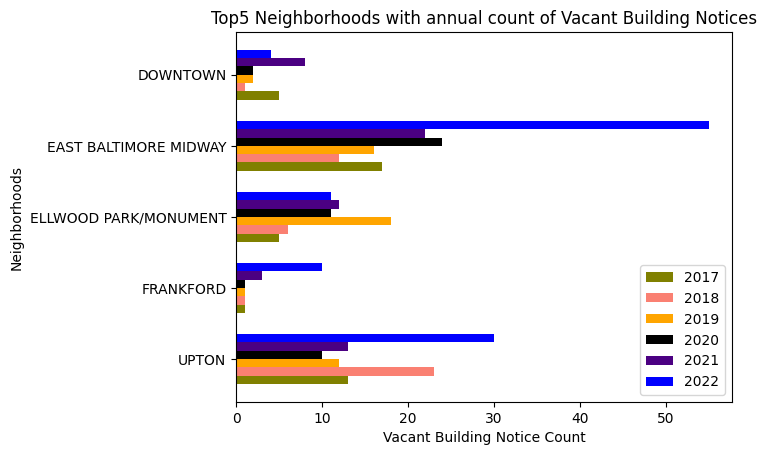

In [ ]:
colors = ['olive', 'salmon', 'orange', 'black', 'indigo','blue']
merged_vacant_df_top5.plot(kind='barh', width=0.7, color=colors)
plt.title('Top5 Neighborhoods with annual count of Vacant Building Notices')
plt.xlabel('Vacant Building Notice Count')
plt.ylabel('Neighborhoods')
plt.show()

In [ ]:
bottom5_nieghborhoods = ['MOUNT VERNON', 'BROADWAY EAST', 'SANDTOWN-WINCHESTER', 'BALTIMORE HIGHLANDS', 'BROOKLYN']
bottom5_nieghborhoods = vacant_df[vacant_df['Neighborhood'].isin(bottom5_nieghborhoods)]

In [ ]:
bottom5_nei_2017 = bottom5_nieghborhoods[bottom5_nieghborhoods['Year'] == 2017]

In [ ]:
bottom5_neighborhood_2017 = bottom5_nei_2017['Neighborhood'].value_counts()

bottom5_neighbor_2017 = pd.DataFrame({
    'Neighborhood': bottom5_neighborhood_2017.index,
    '2017': bottom5_neighborhood_2017.values})

In [ ]:
bottom5_nei_2018 = bottom5_nieghborhoods[bottom5_nieghborhoods['Year'] == 2018]
bottom5_counts_2018 = bottom5_nei_2018['Neighborhood'].value_counts()

bottom5_neighbor_2018 = pd.DataFrame({
    'Neighborhood': bottom5_counts_2018.index,
    '2018': bottom5_counts_2018.values})

In [ ]:
bottom5_nei_2019 = bottom5_nieghborhoods[bottom5_nieghborhoods['Year'] == 2019]
bottom5_counts_2019 = bottom5_nei_2019['Neighborhood'].value_counts()

bottom5_neighbor_2019 = pd.DataFrame({
    'Neighborhood': bottom5_counts_2019.index,
    '2019': bottom5_counts_2019.values})

In [ ]:
bottom5_nei_2020 = bottom5_nieghborhoods[bottom5_nieghborhoods['Year'] == 2020]
bottom5_counts_2020 = bottom5_nei_2020['Neighborhood'].value_counts()

bottom5_neighbor_2020 = pd.DataFrame({
    'Neighborhood': bottom5_counts_2020.index,
    '2020': bottom5_counts_2020.values})

In [ ]:
bottom5_nei_2021 = bottom5_nieghborhoods[bottom5_nieghborhoods['Year'] == 2021]
bottom5_counts_2021 = bottom5_nei_2021['Neighborhood'].value_counts()

bottom5_neighbor_2021 = pd.DataFrame({
    'Neighborhood': bottom5_counts_2021.index,
    '2021': bottom5_counts_2021.values})

In [ ]:
bottom5_nei_2022 = bottom5_nieghborhoods[bottom5_nieghborhoods['Year'] == 2022]
bottom5_counts_2022 = bottom5_nei_2022['Neighborhood'].value_counts()

bottom5_neighbor_2022 = pd.DataFrame({
    'Neighborhood': bottom5_counts_2022.index,
    '2022': bottom5_counts_2022.values})

In [ ]:
merged_vacant_df_bottom5 = pd.merge(bottom5_neighbor_2017[['Neighborhood', '2017']], bottom5_neighbor_2018[['Neighborhood', '2018']], on='Neighborhood', how='outer')
merged_vacant_df_bottom5 = pd.merge(merged_vacant_df_bottom5, bottom5_neighbor_2019[['Neighborhood', '2019']], on='Neighborhood', how='outer')
merged_vacant_df_bottom5 = pd.merge(merged_vacant_df_bottom5, bottom5_neighbor_2020[['Neighborhood', '2020']], on='Neighborhood', how='outer')
merged_vacant_df_bottom5 = pd.merge(merged_vacant_df_bottom5, bottom5_neighbor_2021[['Neighborhood', '2021']], on='Neighborhood', how='outer')
merged_vacant_df_bottom5 = pd.merge(merged_vacant_df_bottom5, bottom5_neighbor_2022[['Neighborhood', '2022']], on='Neighborhood', how='outer')
merged_vacant_df_bottom5 = merged_vacant_df_bottom5.set_index('Neighborhood').sort_index(ascending=True)
merged_vacant_df_bottom5.fillna(0, inplace=True)
merged_vacant_df_bottom5 = merged_vacant_df_bottom5.astype(int)
merged_vacant_df_bottom5

,2017,2018,2019,2020,2021,2022
Neighborhood,,,,,,
BALTIMORE HIGHLANDS,3,4,2,2,1,5
BROADWAY EAST,29,30,48,37,61,64
BROOKLYN,6,13,15,18,23,29
MOUNT VERNON,1,0,0,0,0,1
SANDTOWN-WINCHESTER,48,42,48,28,53,18


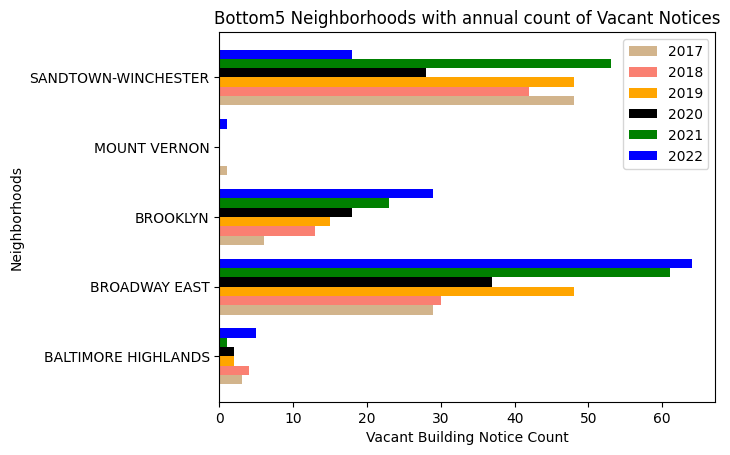

In [ ]:
colors = ['tan', 'salmon', 'orange', 'black', 'green', 'blue']
merged_vacant_df_bottom5.plot(kind='barh', width=0.8, color=colors)
plt.title('Bottom5 Neighborhoods with annual count of Vacant Notices')
plt.xlabel('Vacant Building Notice Count')
plt.ylabel('Neighborhoods')
plt.show()

In [ ]:
#values gotten from project 1
Top5_nieghborhoods = ['FRANKFORD', 'DOWNTOWN', 'UPTON', 'EAST BALTIMORE MIDWAY', 'ELLWOOD PARK/MONUMENT']
top_crime = {
    '2017': [121, 158, 124, 63, 58],
    '2018': [147, 207, 116, 68, 90],
    '2019': [166, 211, 147, 110, 67],
    '2020': [169, 188, 94, 77, 78],
    '2021': [148, 202, 144, 86, 77],
    '2022': [218, 221, 174, 97, 89]
}

top_crime_df = pd.DataFrame(top_crime, index=Top5_nieghborhoods)
print(top_crime_df)

bot_crime = {
    '2017': [68, 115, 207, 81, 226],
    '2018': [64, 117, 155, 63, 137],
    '2019': [58, 111, 147, 56, 163],
    '2020': [61, 91, 171, 43, 139],
    '2021': [52, 151, 155, 76, 128],
    '2022': [41, 87, 167, 40, 178]
}
bottom_5 = ['MOUNT VERNON', 'BROADWAY EAST', 'SANDTOWN-WINCHESTER', 'BALTIMORE HIGHLANDS', 'BROOKLYN']
bot_crime_df = pd.DataFrame(bot_crime, index=bottom_5)
print(bot_crime_df)

                       2017  2018  2019  2020  2021  2022
FRANKFORD               121   147   166   169   148   218
DOWNTOWN                158   207   211   188   202   221
UPTON                   124   116   147    94   144   174
EAST BALTIMORE MIDWAY    63    68   110    77    86    97
ELLWOOD PARK/MONUMENT    58    90    67    78    77    89
                     2017  2018  2019  2020  2021  2022
MOUNT VERNON           68    64    58    61    52    41
BROADWAY EAST         115   117   111    91   151    87
SANDTOWN-WINCHESTER   207   155   147   171   155   167
BALTIMORE HIGHLANDS    81    63    56    43    76    40
BROOKLYN              226   137   163   139   128   178


Corr coefficient scores for Top Neighborhoods with Vacant Notices:
UPTON                    0.569530
FRANKFORD                0.821292
ELLWOOD PARK/MONUMENT   -0.077312
EAST BALTIMORE MIDWAY    0.380629
DOWNTOWN                -0.198814
dtype: float64


Corr coefficient scores for Bottom Neighborhoods with Vacant Notices:
BALTIMORE HIGHLANDS   -0.389608
BROADWAY EAST          0.109011
BROOKLYN              -0.437849
MOUNT VERNON          -0.227010
SANDTOWN-WINCHESTER   -0.046517
dtype: float64


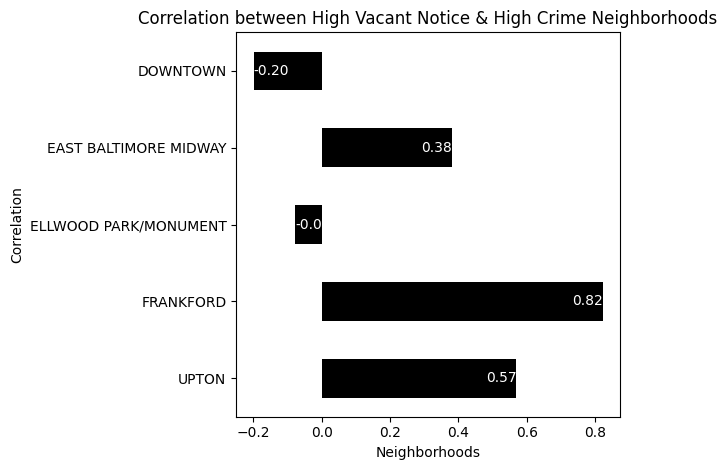

In [ ]:
Top5_Correlation = merged_vacant_df_top5.corrwith(top_crime_df, axis=1)
print(f"Corr coefficient scores for Top Neighborhoods with Vacant Notices:\n{Top5_Correlation}")

Bottom5_Corr = merged_vacant_df_bottom5.corrwith(bot_crime_df, axis = 1)
print('\n')
print(f"Corr coefficient scores for Bottom Neighborhoods with Vacant Notices:\n{Bottom5_Corr}")

ax1 = Top5_Correlation.plot(kind='barh', color='black')
plt.title('Correlation between High Vacant Notice & High Crime Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Correlation')
plt.tight_layout()
for index, value in enumerate(Top5_Correlation):
    ax1.text(value, index, f'{value:.2f}', ha='left' if value < 0 else 'right', va='center', color='white', fontsize=10)
plt.tight_layout()
plt.show()

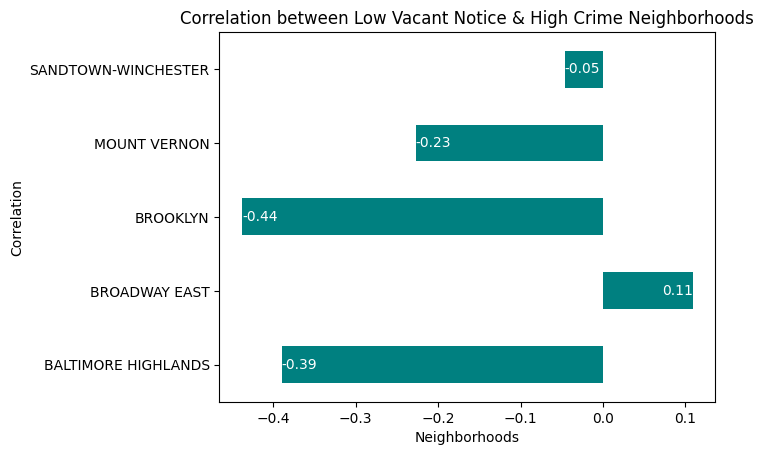

In [ ]:
ax = Bottom5_Corr.plot(kind='barh', color='teal')
plt.title('Correlation between Low Vacant Notice & High Crime Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Correlation')
for index, value in enumerate(Bottom5_Corr):
    ax.text(value, index, f'{value:.2f}', ha='left' if value < 0 else 'right', va='center', color='white', fontsize=10)
plt.show()

In [ ]:
import statsmodels.api as sm

top_crime_counts = top_crime_df.values.flatten()
top5_vacant_Neiborhood = merged_vacant_df_top5.values.flatten()
const = sm.add_constant(top5_vacant_Neiborhood)

lm = sm.OLS(top_crime_counts, const)
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.3393
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.565
Time:                        16:07:14   Log-Likelihood:                -160.30
No. Observations:                  30   AIC:                             324.6
Df Residuals:                      28   BIC:                             327.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.3198     13.833      9.855      0.0

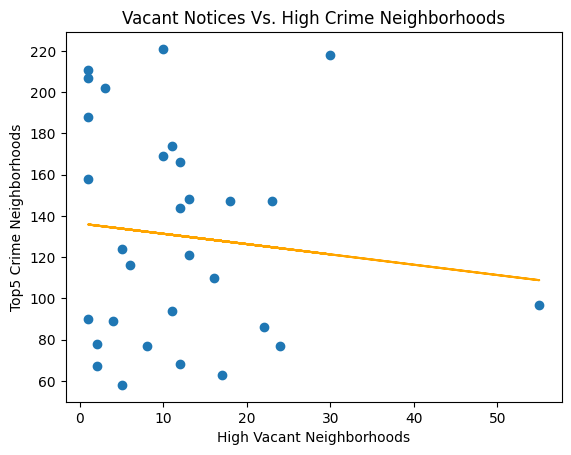

In [ ]:
plt.scatter(top5_vacant_Neiborhood,top_crime_counts, label='Data')
plt.plot(top5_vacant_Neiborhood, res.predict(const), color='orange', label='OLS Regression')

plt.title('Vacant Notices Vs. High Crime Neighborhoods')
plt.xlabel('High Vacant Neighborhoods')
plt.ylabel('Top5 Crime Neighborhoods')
plt.show()

In [ ]:
bot_crime_counts = bot_crime_df.values.flatten()
bottom_crime_Nei = merged_vacant_df_bottom5.values.flatten()
const = sm.add_constant(bottom_crime_Nei)

lm = sm.OLS(bot_crime_counts, const)
res = lm.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     10.24
Date:                Wed, 20 Dec 2023   Prob (F-statistic):            0.00341
Time:                        16:07:14   Log-Likelihood:                -156.37
No. Observations:                  30   AIC:                             316.7
Df Residuals:                      28   BIC:                             319.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0409     12.025      6.989      0.0

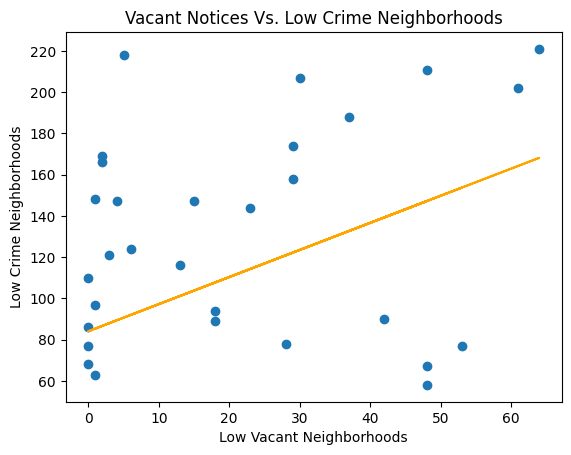

In [ ]:
plt.scatter(bottom_crime_Nei,top_crime_counts, label='Data')
plt.plot(bottom_crime_Nei, res.predict(const), color='orange', label='OLS Regression')

plt.title('Vacant Notices Vs. Low Crime Neighborhoods')
plt.xlabel('Low Vacant Neighborhoods')
plt.ylabel('Low Crime Neighborhoods')
plt.show()

**Null Hypothesis (H0)**: There is no significant difference in crime rates across different categories of vacant building notices for top5 neighborhoods.

**Alternative Hypothesis (H1)**: There is a significant difference in crime rates across different categories of vacant building notices for top5 neighborhoods.

In [ ]:
import scipy.stats
merged_vacant_values = merged_vacant_df_top5.values.flatten()
top_crime_values = top_crime_df.values.flatten()
t_statistic, p_value = scipy.stats.ttest_ind(merged_vacant_values, top_crime_values)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# State the hypothesis
print("\nNull Hypothesis (H0): There is no significant difference in crime rates across different categories of vacant notices for top5 neighborhoods.")
print("Alternative Hypothesis (H1): There is a significant difference in crime rates across different categories of vacant notices for top5 neighborhoods.")

# Interpret the results
if p_value < 0.05:
    print("\nReject the null hypothesis. There is a significant difference between the Top5 high crimes neighborhoods and the Top5 vacant neighborhoods.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference between the Top5 high crimes neighborhoods and the Top5 vacant neighborhoods.")

T-Statistic: -12.27845623588145
P-Value: 9.03446944049104e-18

Null Hypothesis (H0): There is no significant difference in crime rates across different categories of vacant notices for top5 neighborhoods.
Alternative Hypothesis (H1): There is a significant difference in crime rates across different categories of vacant notices for top5 neighborhoods.

Reject the null hypothesis. There is a significant difference between the Top5 high crimes neighborhoods and the Top5 vacant neighborhoods.


In [ ]:
import scipy.stats
merged_vacant_values_b = merged_vacant_df_bottom5.values.flatten()
top_crime_values_b = bot_crime_df.values.flatten()
t_statistic, p_value = scipy.stats.ttest_ind(merged_vacant_values_b, top_crime_values_b)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# State the hypothesis
print("\nNull Hypothesis (H0): There is no significant difference in crime rates across different categories of vacant notices for bottom5 neighborhoods.")
print("Alternative Hypothesis (H1): There is a significant difference in crime rates across different categories of vacant notices for bottom5 neighborhoods.")

# Interpret the results
if p_value < 0.05:
    print("\nReject the null hypothesis. There is a significant difference between the Bottom5 high crimes neighborhoods and the Bottom5 vacant neighborhoods.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference between the Bottom5 high crimes neighborhoods and the Bottom5 vacant neighborhoods.")

T-Statistic: -8.75254394691726
P-Value: 3.4031304198486973e-12

Null Hypothesis (H0): There is no significant difference in crime rates across different categories of vacant notices for bottom5 neighborhoods.
Alternative Hypothesis (H1): There is a significant difference in crime rates across different categories of vacant notices for bottom5 neighborhoods.

Reject the null hypothesis. There is a significant difference between the Bottom5 high crimes neighborhoods and the Bottom5 vacant neighborhoods.


### **Citywide Analysis**

---



In [ ]:
url = 'https://github.com/naalemi/Projecsts/raw/main/Part_1_Crime_Data%20(2017-2022)%20(1).csv'

In [ ]:
crimes = pd.read_csv(url)

In [ ]:
crimes['Year'] = pd.to_datetime(crimes['CrimeDateTime']).dt.year
crimes.drop('New_District', axis=1, inplace=True)
crimes.drop('Ethnicity', axis=1, inplace=True)
crimes.drop('Age', axis=1, inplace=True)
crimes.drop('Gender', axis=1, inplace=True)
crimes.drop('PremiseType', axis=1, inplace=True)
crimes.drop('Inside_Outside', axis=1, inplace=True)
crimes.drop('Race', axis=1, inplace=True)
crimes.dropna(inplace=True)

In [ ]:
six_year_timeline = (crimes['Year'] >= 2017) & (crimes['Year'] <= 2022)
crimes = crimes.loc[six_year_timeline]

In [ ]:
crimes['CrimeDateTime'] = pd.to_datetime(crimes['CrimeDateTime'])

In [ ]:
crimes['Neighborhood'] = crimes['Neighborhood'].str.strip()

In [ ]:
vacant_notice_df = pd.read_csv("https://github.com/naalemi/Projecsts/raw/main/Vacant_Building_Notices.csv")

In [ ]:
vacant_notice_df['Year'] = pd.to_datetime(vacant_notice_df['DateNotice']).dt.year

In [ ]:
selected_years = [2017, 2018, 2019, 2020, 2021, 2022]
vacant_selected_years = vacant_notice_df[vacant_notice_df['Year'].isin(selected_years)]
vacant_counts_by_year = vacant_selected_years.groupby('Year').size().reset_index(name='Count')
vacant_counts_by_year

,Year,Count
0,2017,672
1,2018,736
2,2019,897
3,2020,764
4,2021,1092
5,2022,1385


In [ ]:
selected_years = [2017, 2018, 2019, 2020, 2021, 2022]
crime_selected_years = crimes[crimes['Year'].isin(selected_years)]
crime_selected_years = crime_selected_years.groupby('Year').size().reset_index(name='Count')
crime_selected_years

,Year,Count
0,2017,6779
1,2018,6500
2,2019,6720
3,2020,6300
4,2021,6541
5,2022,6999


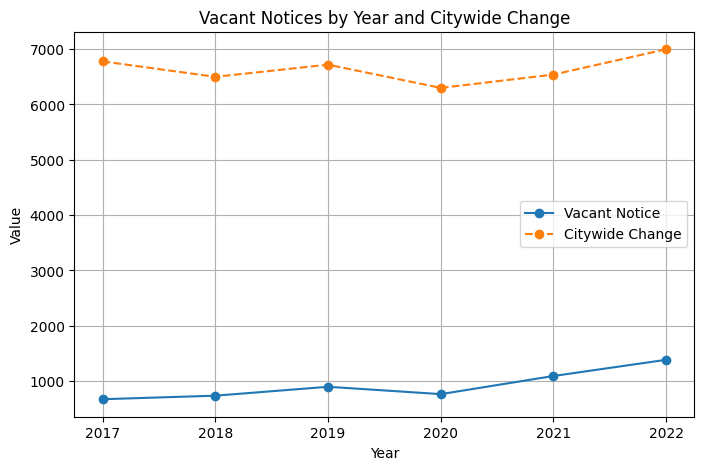

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(vacant_counts_by_year['Year'], vacant_counts_by_year['Count'], label='Vacant Notice', marker='o')

ax.plot(crime_selected_years['Year'], crime_selected_years['Count'], label='Citywide Change', marker='o', linestyle='--')

ax.set_title('Vacant Notices by Year and Citywide Change')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.legend()
plt.grid(True)

plt.show()

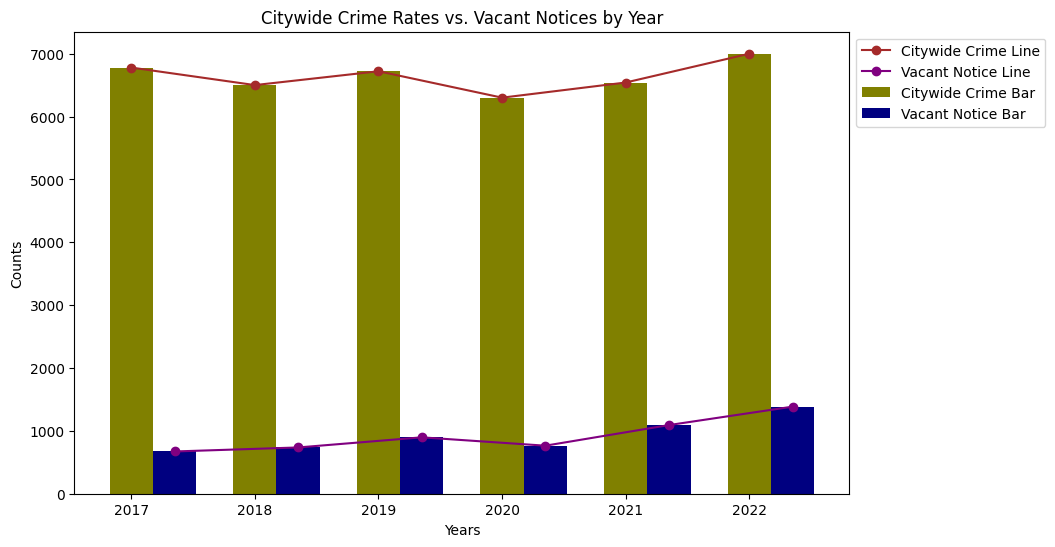

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
citywide_change_bars = ax.bar(crime_selected_years['Year'], crime_selected_years['Count'], width=bar_width, label='Citywide Crime Bar', color='olive')
vacant_x_positions = [x + bar_width for x in crime_selected_years['Year']]
vacant_bars = ax.bar(vacant_x_positions, vacant_counts_by_year['Count'], width=bar_width, label='Vacant Notice Bar', color='navy')

lines = ax.plot(crime_selected_years['Year'], crime_selected_years['Count'], color='brown', linestyle='-', marker='o', label='Citywide Crime Line')
lines += ax.plot(vacant_x_positions, vacant_counts_by_year['Count'], color='purple', linestyle='-', marker='o', label='Vacant Notice Line')

ax.set_title('Citywide Crime Rates vs. Vacant Notices by Year')
ax.set_xlabel('Years')
ax.set_ylabel('Counts')

ax.legend(loc='upper left')
ax.legend(lines, ['Citywide Crime Line', 'Vacant Notices Line'], loc='upper left', bbox_to_anchor=(1, 1))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#Aditya Kushal Soumitra
##BPD Arrests: https://arcg.is/0SLeza0
###PUT YOUR PART HERE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#values gotten from project 1
import pandas as pd

increase_5 = ['Frankford', 'Downtown', 'Upton', 'East Baltimore Midway', 'Ellwood Park/Monument']
decrease_5 = ['Mount Vernon', 'Broadway East', 'Sandtown-Winchester', 'Baltimore Highlands', 'Brooklyn']

top_crime = {
    '2017': [121, 158, 124, 63, 58],
    '2018': [147, 207, 116, 68, 90],
    '2019': [166, 211, 147, 110, 67],
    '2020': [169, 188, 94, 77, 78],
    '2021': [148, 202, 144, 86, 77],
    '2022': [218, 221, 174, 97, 89]
}

top_crime_df = pd.DataFrame(top_crime, index=increase_5)
print(top_crime_df)

print("\n")

bottom_crime = {
    '2017': [68, 115, 207, 81, 226],
    '2018': [64, 117, 155, 63, 137],
    '2019': [58, 111, 147, 56, 163],
    '2020': [61, 91, 171, 43, 139],
    '2021': [52, 151, 155, 76, 128],
    '2022': [41, 87, 167, 40, 178]
}

bottom_crime_df = pd.DataFrame(bottom_crime, index=decrease_5)
print(bottom_crime_df)

                       2017  2018  2019  2020  2021  2022
Frankford               121   147   166   169   148   218
Downtown                158   207   211   188   202   221
Upton                   124   116   147    94   144   174
East Baltimore Midway    63    68   110    77    86    97
Ellwood Park/Monument    58    90    67    78    77    89


                     2017  2018  2019  2020  2021  2022
Mount Vernon           68    64    58    61    52    41
Broadway East         115   117   111    91   151    87
Sandtown-Winchester   207   155   147   171   155   167
Baltimore Highlands    81    63    56    43    76    40
Brooklyn              226   137   163   139   128   178


In [ ]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

arrests_df = pd.read_csv('BPD_Arrests.csv')
print(arrests_df.shape)
arrests_df.info()

(5919, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5919 entries, 0 to 5918
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  3574 non-null   float64
 1   Y                  3574 non-null   float64
 2   RowID              5919 non-null   int64  
 3   IncidentNumber     3632 non-null   object 
 4   ArrestNumber       5620 non-null   float64
 5   Age                5917 non-null   float64
 6   Gender             5919 non-null   object 
 7   Race               5918 non-null   object 
 8   ArrestDateTime     5918 non-null   object 
 9   ArrestLocation     3623 non-null   object 
 10  IncidentOffence    5918 non-null   object 
 11  IncidentLocation   3623 non-null   object 
 12  Charge             5292 non-null   object 
 13  ChargeDescription  5918 non-null   object 
 14  District           3426 non-null   object 
 15  Post               3426 non-null   float64
 16  Neighborhood 

In [ ]:
#summarize the counts by neighborhood for 2017 and 2022 to identify if there has been an increase or decrease that correlates to the change in crime - data seems to go from 2014 to 2023

#Now get data only from 2017 to 2022. Clean data by removing all neighborhood values that is not in the top or bottom 5 neighborhoods for crime rate (referenced from Project 1)

#Top neighborhoods in crime rate: FRANKORD, DOWNTOWN, UPTON, EAST BALTIMORE MIDWAY, ELLWOOD PARK/MONUMENT
#Bottom neighborhoods in crime rate: MOUNT VERNON, BROADWAY EAST, SANDTOWN-WINCHESTER, BALTIMORE HIGHLANDS, BROOKLYN

#going to assume created date is the date the crime occurredgun_df['ArrestDateTime'] = pd.to_datetime(gun_df['ArrestDateTime'], errors='coerce')
start_date = '2017-01-01'
end_date = '2022-12-31'
time_range = (arrests_df['ArrestDateTime'] >= start_date) & (arrests_df['ArrestDateTime'] <= end_date)
arrests_df = arrests_df.loc[time_range]
proj_neighbourhood = ['Frankford', 'Downtown', 'Upton', 'East Baltimore Midway', 'Ellwood Park/Monument', 'Mount Vernon', 'Broadway East', 'Sandtown-Winchester', 'Baltimore Highlands', 'Brooklyn']
neighbourhood_df = arrests_df[arrests_df['Neighborhood'].isin(proj_neighbourhood)]

#rows went from 3494 to 2299
neighbourhood_df.info()
neighbourhood_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 36 to 5893
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  164 non-null    float64
 1   Y                  164 non-null    float64
 2   RowID              164 non-null    int64  
 3   IncidentNumber     159 non-null    object 
 4   ArrestNumber       164 non-null    float64
 5   Age                164 non-null    float64
 6   Gender             164 non-null    object 
 7   Race               164 non-null    object 
 8   ArrestDateTime     164 non-null    object 
 9   ArrestLocation     164 non-null    object 
 10  IncidentOffence    164 non-null    object 
 11  IncidentLocation   164 non-null    object 
 12  Charge             159 non-null    object 
 13  ChargeDescription  164 non-null    object 
 14  District           164 non-null    object 
 15  Post               164 non-null    float64
 16  Neighborhood       164 n

,X,Y,RowID,IncidentNumber,ArrestNumber,Age,Gender,Race,ArrestDateTime,ArrestLocation,...,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape
36,1.416162e+06,595747.225917,37,21L08204,21168270.0,28.0,F,B,2021/12/31 06:00:00+00,1500 PENNSYLVANIA AVE,...,1500 PENNSYLVANIA AVE,1 1415,COMMON ASSULT,Central,123.0,Upton,39.3019,-76.6331,"(39.3019,-76.6331)",NaN
41,1.420423e+06,592049.487204,42,21L08192,21168260.0,39.0,M,B,2021/12/31 00:31:00+00,200 PARK ST,...,200 PARK ST,2 0055,HIT AND RUN,Central,114.0,Downtown,39.2917,-76.6181,"(39.2917,-76.6181)",NaN
59,1.425148e+06,572801.739563,60,20L08423,20198488.0,23.0,M,B,2020/12/31 13:42:00+00,500 MAUDE AVE,...,500 MAUDE AVE,1 1415,ASSAULT,Southern,913.0,Brooklyn,39.2388,-76.6017,"(39.2388,-76.6017)",NaN
62,1.419742e+06,592265.192286,63,20L08377,20198605.0,61.0,M,B,2020/12/31 11:12:00+00,200 KIMMEL ST,...,200 KIMMEL ST,2 0910,1ST DEGREE ATTEMPT MURDER,Central,114.0,Downtown,39.2923,-76.6205,"(39.2923,-76.6205)",NaN
69,1.413124e+06,598357.700795,70,20L08326,20197985.0,26.0,M,B,2020/12/31 08:06:00+00,1600 WESTWOOD ST,...,1600 WESTWOOD ST,1 1420,COMMON ASSAULT,Western,734.0,Sandtown-Winchester,39.3091,-76.6438,"(39.3091,-76.6438)",NaN


In [ ]:
# Assuming 'ArrestDateTime' is a string column in 'nei_df'
# Convert 'ArrestDateTime' to datetime format
neighbourhood_df['ArrestDateTime'] = pd.to_datetime(neighbourhood_df['ArrestDateTime'], errors='coerce')

# Create a series that has neighborhoods with corresponding series that has years and crime counts within that year
crime_neighbourhood = pd.Series(dtype='O')
years = pd.Series({'2017': 0, '2018': 0, '2019': 0, '2020': 0, '2021': 0, '2022': 0})

for idx, row in neighbourhood_df.iterrows():
    neighbourhood = row['Neighborhood']
    year = row['ArrestDateTime'].year if pd.notnull(row['ArrestDateTime']) else None

    if neighbourhood not in crime_neighbourhood:
        crime_neighbourhood[neighbourhood] = years.copy()
        if year is not None:
            crime_neighbourhood[neighbourhood][str(year)] += 1
    else:
        if year is not None:
            crime_neighbourhood[neighbourhood][str(year)] += 1

<ipython-input-54-517f1e4b8a3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbourhood_df['ArrestDateTime'] = pd.to_datetime(neighbourhood_df['ArrestDateTime'], errors='coerce')


In [ ]:
#a summary table that shows the counts by year for the top 5 neighborhoods
increase_5 = ['Frankford', 'Downtown', 'Upton', 'East Baltimore Midway', 'Ellwood Park/Monument']
summary_of_increase = pd.DataFrame(index=increase_5, columns=crime_neighbourhood['Frankford'].index)
for neighbourhood in increase_5:
    summary_of_increase.loc[neighbourhood] = crime_neighbourhood[neighbourhood]
summary_of_increase['2022'] = pd.to_numeric(summary_of_increase['2022'])
summary_of_increase['2021'] = pd.to_numeric(summary_of_increase['2021'])
summary_of_increase['2020'] = pd.to_numeric(summary_of_increase['2020'])
summary_of_increase['2019'] = pd.to_numeric(summary_of_increase['2019'])
summary_of_increase['2018'] = pd.to_numeric(summary_of_increase['2018'])
summary_of_increase['2017'] = pd.to_numeric(summary_of_increase['2017'])

print(summary_of_increase)

                       2017  2018  2019  2020  2021  2022
Frankford                 8     1     0     3     1     0
Downtown                  4     8     4     5     5     0
Upton                     7     3     4     4     4     0
East Baltimore Midway     6     1     1     1     0     0
Ellwood Park/Monument     2     4     6     3     1     0


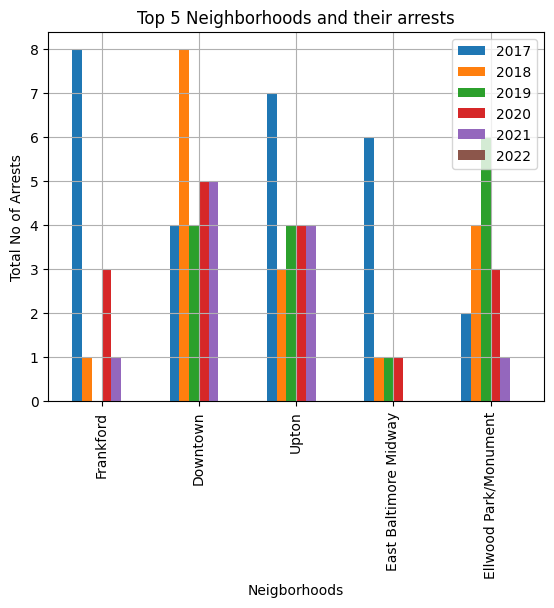

In [ ]:
#Visualization of Top 5 neighborhoods with Highest Arrests

summary_of_increase.plot(kind='bar', width=.6)
plt.xlabel('Neigborhoods')
plt.ylabel('Total No of Arrests')
plt.title('Top 5 Neighborhoods and their arrests')
plt.grid(True)

In [ ]:
#a summary table that shows the counts by year for the bottom 5 neighborhoods
decrease_5 = ['Mount Vernon', 'Broadway East', 'Sandtown-Winchester', 'Baltimore Highlands', 'Brooklyn']
summary_of_decrease = pd.DataFrame(index=decrease_5, columns=crime_neighbourhood['Mount Vernon'].index)
for neighbourhood in decrease_5:
    summary_of_decrease.loc[neighbourhood] = crime_neighbourhood[neighbourhood]
summary_of_decrease['2022'] = pd.to_numeric(summary_of_decrease['2022'])
summary_of_decrease['2021'] = pd.to_numeric(summary_of_decrease['2021'])
summary_of_decrease['2020'] = pd.to_numeric(summary_of_decrease['2020'])
summary_of_decrease['2019'] = pd.to_numeric(summary_of_decrease['2019'])
summary_of_decrease['2018'] = pd.to_numeric(summary_of_decrease['2018'])
summary_of_decrease['2017'] = pd.to_numeric(summary_of_decrease['2017'])

print(summary_of_decrease)

                     2017  2018  2019  2020  2021  2022
Mount Vernon            2     2     0     1     2     0
Broadway East           7     5     2     0     0     0
Sandtown-Winchester     8     7     1     4     2     0
Baltimore Highlands     1     3     1     4     3     0
Brooklyn                5    10     5     3     0     0


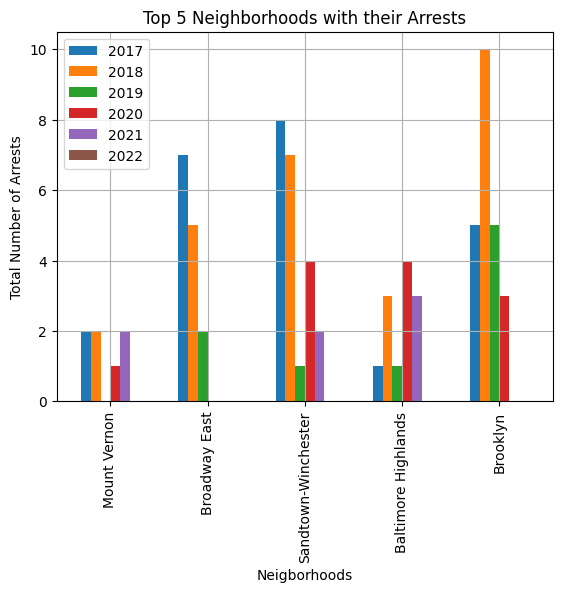

In [ ]:
#Visualization of Top 5 neighborhoods with Lowest Arrests

summary_of_decrease.plot(kind='bar', width=.6)
plt.xlabel('Neigborhoods')
plt.ylabel('Total Number of Arrests')
plt.title('Top 5 Neighborhoods with their Arrests')
plt.grid(True)

In [ ]:
# Check for missing values
print("Missing values in summary_table_increase:")
print(summary_of_increase.isnull().sum())

print("\nMissing values in summary_table_decrease:")
print(summary_of_decrease.isnull().sum())

print("\nMissing values in top_crime_df dataframe:")
print(top_crime_df.isnull().sum())

print("\nMissing values in bot_crime_df dataframe:")
print(bottom_crime_df.isnull().sum())

# Convert data types if needed
summary_of_increase = summary_of_increase.astype(float)
summary_of_decreasee = summary_of_decrease.astype(float)

# Now check for correlation with arrests
top_correlation = summary_of_increase.corrwith(top_crime_df, axis=1)
bottom_correlation = summary_of_decrease.corrwith(bottom_crime_df, axis=1)

# Print the results
print("\nHighest Neighborhoods Correlation:")
print(top_correlation)
print("\nLowest Neighborhoods Correlation:")
bottom_correlation.head()

Missing values in summary_table_increase:
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

Missing values in summary_table_decrease:
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

Missing values in top_crime_df dataframe:
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

Missing values in bot_crime_df dataframe:
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

Highest Neighborhoods Correlation:
Frankford               -0.661270
Downtown                -0.213841
Upton                   -0.553300
East Baltimore Midway   -0.587858
Ellwood Park/Monument   -0.260525
dtype: float64

Lowest Neighborhoods Correlation:


Mount Vernon           0.582130
Broadway East          0.127623
Sandtown-Winchester    0.593366
Baltimore Highlands    0.061484
Brooklyn               0.014314
dtype: float64

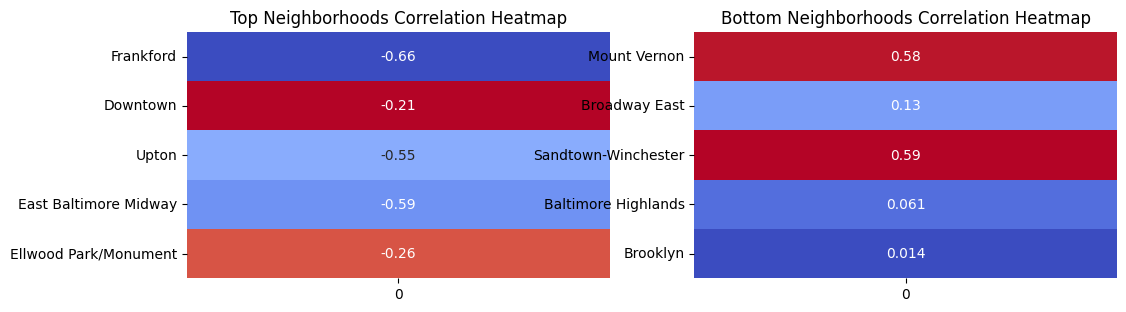

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlation
plt.figure(figsize=(12, 8))

# Heatmap for top_correlation
plt.subplot(2, 2, 1)
sns.heatmap(top_correlation.to_frame(), cmap='coolwarm', annot=True, cbar=False)
plt.title('Top Neighborhoods Correlation Heatmap')

# Heatmap for bottom_correlation
plt.subplot(2, 2, 2)
sns.heatmap(bottom_correlation.to_frame(), cmap='coolwarm', annot=True, cbar=False)
plt.title('Bottom Neighborhoods Correlation Heatmap')

# Adjust the space between subplots
plt.subplots_adjust(hspace=.5)

plt.show()

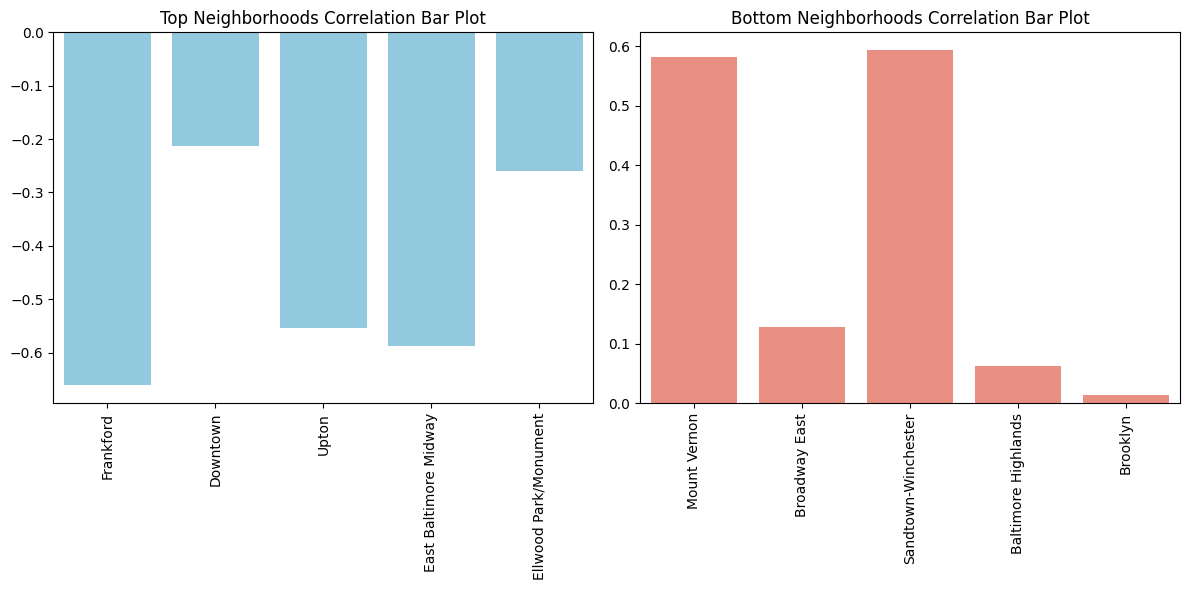

In [ ]:
# Bar plot for top_correlation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_correlation.index, y=top_correlation.values, color='skyblue')
plt.xticks(rotation=90)
plt.title('Top Neighborhoods Correlation Bar Plot')

# Bar plot for bottom_correlation
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_correlation.index, y=bottom_correlation.values, color='salmon')
plt.xticks(rotation=90)
plt.title('Bottom Neighborhoods Correlation Bar Plot')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm


# Flatten the data
top_crime_counts = top_crime_df.values.flatten()
top_arrests_counts = summary_of_increase.values.flatten()

# Add a constant term to the independent variable
const_top = sm.add_constant(top_arrests_counts)

# Perform linear regression
lm_top = sm.OLS(top_crime_counts, const_top)
res_top = lm_top.fit()

# Print results for top neighborhoods
print("Top Neighborhoods Results ")
res_top.summary()

Top Neighborhoods Results 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                   0.08338
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.775
Time:                        16:07:30   Log-Likelihood:                -160.44
No. Observations:                  30   AIC:                             324.9
Df Residuals:                      28   BIC:                             327.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.3005     14.667      8.679      0.000      97.256     157.345
x1             1.1161      3.865      0.289      0.775      -6.801       9.034
==============================================================================
Omnibus:                        5.247   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                2.154
Skew:                           0.308   Prob(JB):                        0.341
Kurtosis:                       1.840   Cond. No.                         6.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

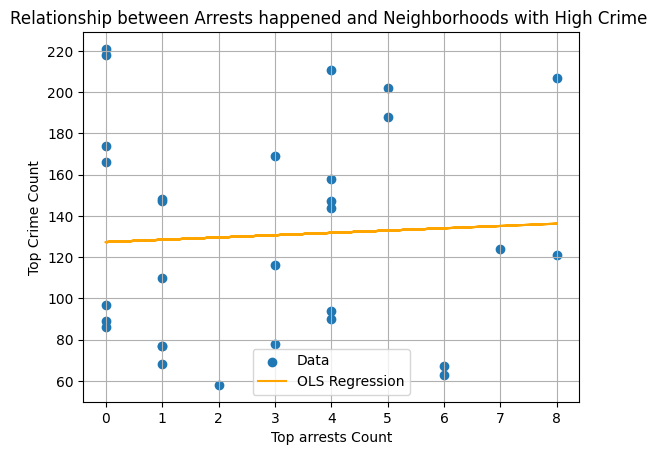

In [ ]:
#Ordinary Least Squares visualization for High Crime Neigborhoods
plt.scatter(top_arrests_counts,top_crime_counts, label='Data')
plt.plot(top_arrests_counts, res_top.predict(const_top), color='orange', label='OLS Regression')

plt.title('Relationship between Arrests happened and Neighborhoods with High Crime ')
plt.xlabel('Top arrests Count')
plt.ylabel('Top Crime Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

# Now, repeat the process for bottom neighborhoods
bottom_crime_counts = bottom_crime_df.sum(axis=1).values  # Summing up crime counts for each bottom neighborhood
bottom_arrests_counts = summary_of_decrease.sum(axis=1).values  # Summing up gun offender counts for each bottom neighborhood

# Check lengths of arrays
if len(bottom_crime_counts) != len(bottom_arrests_counts):
    raise ValueError("Lengths of bottom crime and arrests arrays do not match")

const_bottom = sm.add_constant(bottom_arrests_counts)

# Perform linear regression for bottom neighborhoods
lm_bottom = sm.OLS(bottom_crime_counts, const_bottom)
res_bottom = lm_bottom.fit()

# Print results for bottom neighborhoods
print("\nBottom Neighborhoods Results")
res_bottom.summary()


Bottom Neighborhoods Results


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     32.28
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0108
Time:                        16:07:30   Log-Likelihood:                -29.181
No. Observations:                   5   AIC:                             62.36
Df Residuals:                       3   BIC:                             61.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.1944    131.640     -0.207      0.850    -446.130     391.741
x1            44.6663      7.861      5.682      0.011      19.648      69.685
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.575
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.833
Skew:                          -0.943   Prob(JB):                        0.659
Kurtosis:                       2.335   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

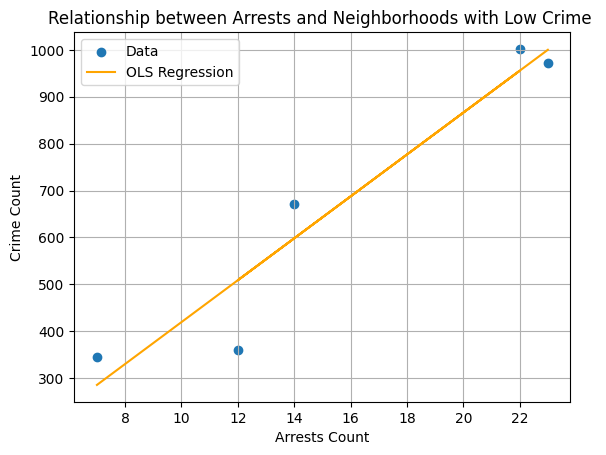

In [ ]:
# Ordinary Least Squares visualization for Low Crime Neigborhoods
plt.scatter(bottom_arrests_counts, bottom_crime_counts, label='Data')
plt.plot(bottom_arrests_counts, res_bottom.predict(const_bottom), color='orange', label='OLS Regression')

plt.title('Relationship between Arrests and Neighborhoods with Low Crime ')
plt.xlabel('Arrests Count')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

# Assuming 'top_crime_df', 'summary_table_inc', 'bot_crime_df', and 'summary_table_dec' are already defined

# Flatten the data for all neighborhoods
all_crime_counts = np.concatenate([top_crime_df.sum(axis=1).values, bottom_crime_df.sum(axis=1).values])
all_arrests_counts = np.concatenate([summary_of_increase.sum(axis=1).values, summary_of_decrease.sum(axis=1).values])

# Check lengths of arrays
if len(all_crime_counts) != len(all_arrests_counts):
    raise ValueError("Lengths of all crime and arrest  arrays do not match")

const_all = sm.add_constant(all_arrests_counts)

# Perform linear regression for all neighborhoods
lm_all = sm.OLS(all_crime_counts, const_all)
res_all = lm_all.fit()

# Print results for all neighborhoods
print("Results for All Neighborhoods")
res_all.summary()

Results for All Neighborhoods


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     15.40
Date:                Wed, 20 Dec 2023   Prob (F-statistic):            0.00439
Time:                        16:07:31   Log-Likelihood:                -65.386
No. Observations:                  10   AIC:                             134.8
Df Residuals:                       8   BIC:                             135.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.4947    168.399      0.638      0.541    -280.835     495.824
x1            37.7320      9.614      3.925      0.004      15.562      59.902
==============================================================================
Omnibus:                        2.110   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                0.517
Skew:                           0.547   Prob(JB):                        0.772
Kurtosis:                       3.209   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

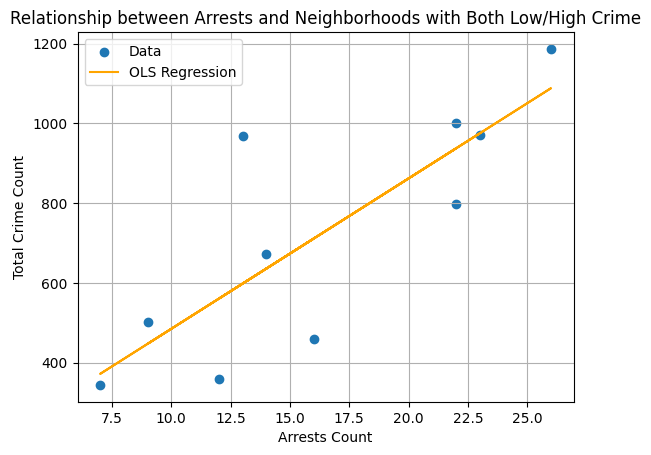

In [ ]:
# Ordinary Least Squares visualization for High/Low Crime Neigborhoods
plt.scatter(all_arrests_counts, all_crime_counts, label='Data')
plt.plot(all_arrests_counts, res_all.predict(const_all), color='orange', label='OLS Regression')

plt.title('Relationship between Arrests and Neighborhoods with Both Low/High Crime')
plt.xlabel('Arrests Count')
plt.ylabel('Total Crime Count')
plt.legend()
plt.grid(True)
plt.show()

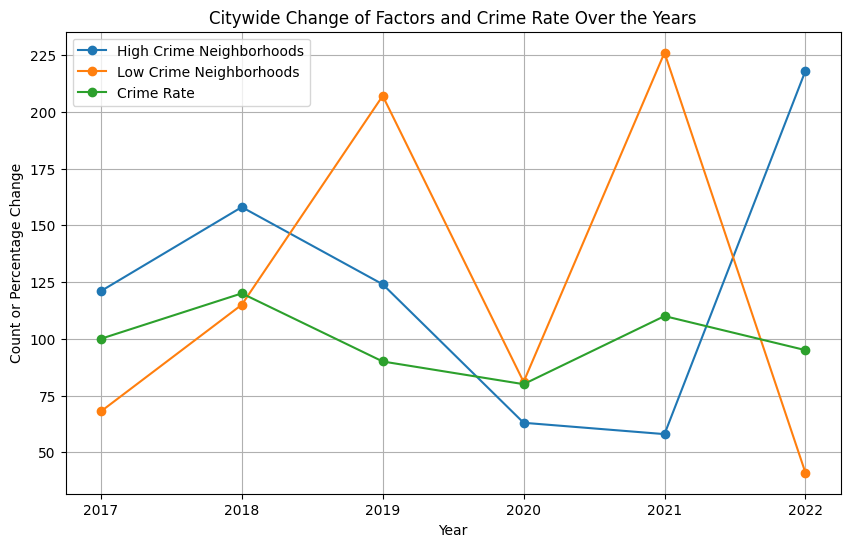

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022],  # Replace with your actual years
    'CrimeRate': [100, 120, 90, 80, 110, 95],  # Replace with your actual crime rates
    'HighCrimeNeighborhoods': [121, 158, 124, 63, 58, 218],  # Replace with your actual data
    'LowCrimeNeighborhoods': [68, 115, 207, 81, 226, 41]  # Replace with your actual data
}

df = pd.DataFrame(data)

# Create a visualization
plt.figure(figsize=(10, 6))

# Hypothetical factors for illustration
plt.plot(df['Year'], df['HighCrimeNeighborhoods'], label='High Crime Neighborhoods', marker='o')
plt.plot(df['Year'], df['LowCrimeNeighborhoods'], label='Low Crime Neighborhoods', marker='o')
plt.plot(df['Year'], df['CrimeRate'], label='Crime Rate', marker='o')

plt.title('Citywide Change of Factors and Crime Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Count or Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

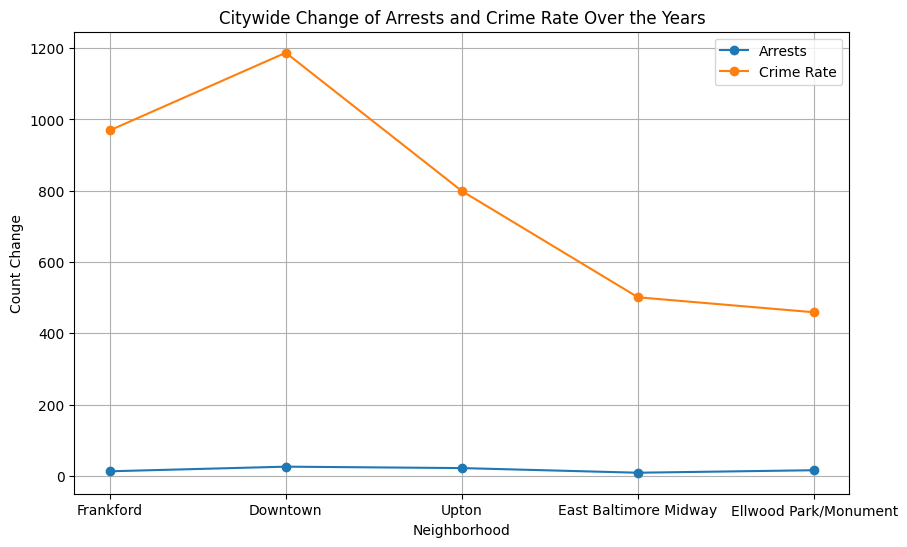

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Sum up the arrests for each neighborhood over the years
arrests_by_neighborhood = summary_of_increase.sum(axis=1)


crime_rate_change = top_crime_df.sum(axis=1)

# Combine the changes in arrests and crime rates
combined_data = pd.concat([arrests_by_neighborhood, crime_rate_change], axis=1)
combined_data.columns = ['Arrests', 'Crime Rate']

# Create a visualization
plt.figure(figsize=(10, 6))

plt.plot(combined_data.index, combined_data['Arrests'], label='Arrests', marker='o')
plt.plot(combined_data.index, combined_data['Crime Rate'], label='Crime Rate', marker='o')

plt.title('Citywide Change of Arrests and Crime Rate Over the Years')
plt.xlabel('Neighborhood')
plt.ylabel('Count Change')
plt.legend()
plt.grid(True)
plt.show()

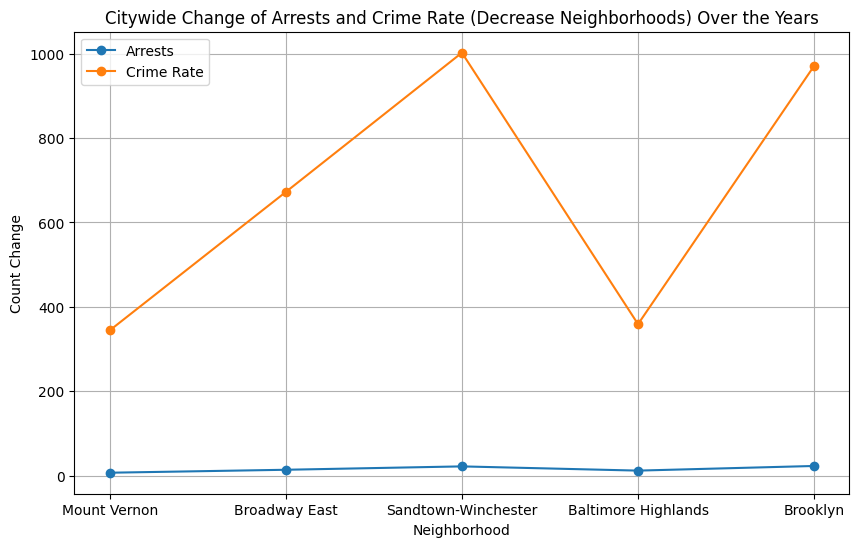

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Sum up the arrests for each neighborhood over the years
decrease_arrests_by_neighborhood = summary_of_decrease.sum(axis=1)

# Assuming you have a DataFrame named 'bottom_crime_df' with the corresponding crime rates
crime_rate_change_decrease = bottom_crime_df.sum(axis=1)

# Combine the changes in arrests and crime rates for the decrease neighborhoods
combined_data_decrease = pd.concat([decrease_arrests_by_neighborhood, crime_rate_change_decrease], axis=1)
combined_data_decrease.columns = ['Arrests', 'Crime Rate']

# Create a visualization for the decrease neighborhoods
plt.figure(figsize=(10, 6))

plt.plot(combined_data_decrease.index, combined_data_decrease['Arrests'], label='Arrests', marker='o')
plt.plot(combined_data_decrease.index, combined_data_decrease['Crime Rate'], label='Crime Rate', marker='o')

plt.title('Citywide Change of Arrests and Crime Rate (Decrease Neighborhoods) Over the Years')
plt.xlabel('Neighborhood')
plt.ylabel('Count Change')
plt.legend()
plt.grid(True)
plt.show()


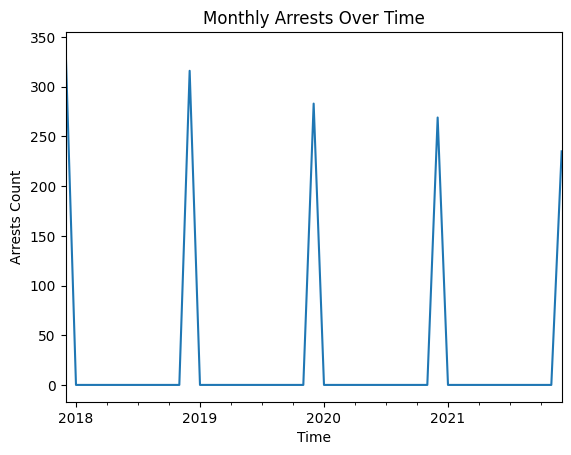

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'ArrestDateTime' to datetime format
arrests_df['ArrestDateTime'] = pd.to_datetime(arrests_df['ArrestDateTime'], errors='coerce')

# Create a time series plot of arrests
arrests_df.set_index('ArrestDateTime', inplace=True)
arrests_df.resample('M').size().plot()

plt.title('Monthly Arrests Over Time')
plt.xlabel('Time')
plt.ylabel('Arrests Count')
plt.show()

#Joseph and James
##Gun Offender Registry: https://arcg.is/1K9fDH# New Section


Gun offender NULL HYPOTHESIS: Gun offender registry has no significant effect on crime rate within a the top and bottom crime rate neighborhoods from 2017-2022.

Gun Offender Registry: https://arcg.is/1K9fDH


In [7]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

#grab file from folder and put into a dataframe - INPUT YOUR OWN CSV PATH
#Please note I downloaded the CSV file from Open Baltimore
gun_df = pd.read_csv('https://github.com/naalemi/Projecsts/raw/main/Gun_Offenders_Registry.csv')
print(gun_df.shape)
gun_df.head()

(3494, 23)


,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,...,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,GlobalID
0,1.407179e+06,599063.663408,1,23-0399,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Bullock,Aniyja,NaN,2002/05/10 00:00:00+00,...,Baltimore,Md,21216.0,Western,731.0,Walbrook,39.3111,-76.6648,"(39.3111,-76.6648)",1bce1b2f-22bd-45b1-94a1-ab84c5e96c4f
1,NaN,NaN,2,23-0398,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Harper,Kamonte,Kaireem,1975/09/10 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",576f2d18-d902-4547-adbf-55415ccf1835
2,1.406444e+06,598951.702849,3,23-0397,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Mason,Duwan,Lamont,1998/06/11 00:00:00+00,...,Baltimore,Md,21216.0,Southwest,811.0,Walbrook,39.3108,-76.6674,"(39.3108,-76.6674)",de5cae18-b61e-4115-bd9e-72c90ca88360
3,1.402451e+06,591907.706139,4,23-0396,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Edison,Malik,NaN,1998/06/13 00:00:00+00,...,Baltimore,Md,21229.0,Southwest,824.0,Allendale,39.2915,-76.6816,"(39.2915,-76.6816)",c44d98df-a356-4bda-af04-9ea9b31e18eb
4,NaN,NaN,5,23-0395,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Johnson,Kristopher,NaN,1988/03/20 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",69a4c17a-867f-40fe-99bb-1109d6146c8f


In [8]:
#summarize the counts by neighborhood for 2017 and 2022 to identify if there has been an increase or decrease that correlates to the change in crime - data seems to go from 2014 to 2023

#Now get data only from 2017 to 2022. Clean data by removing all neighborhood values that is not in the top or bottom 5 neighborhoods for crime rate (referenced from Project 1)

#Top neighborhoods in crime rate: FRANKORD, DOWNTOWN, UPTON, EAST BALTIMORE MIDWAY, ELLWOOD PARK/MONUMENT
#Bottom neighborhoods in crime rate: MOUNT VERNON, BROADWAY EAST, SANDTOWN-WINCHESTER, BALTIMORE HIGHLANDS, BROOKLYN

#going to assume created date is the date the crime occurred

gun_df['CreatedDate'] = pd.to_datetime(gun_df['CreatedDate'], errors='coerce')
start_date = '2017-01-01'
end_date = '2022-12-31'
time_range = (gun_df['CreatedDate'] >= start_date) & (gun_df['CreatedDate'] <= end_date)
gun_df = gun_df.loc[time_range]
proj_1_nei = ['Frankford', 'Downtown', 'Upton', 'East Baltimore Midway', 'Ellwood Park/Monument', 'Mount Vernon', 'Broadway East', 'Sandtown-Winchester', 'Baltimore Highlands', 'Brooklyn']
nei_df = gun_df[gun_df['Neighborhood'].isin(proj_1_nei)]

#rows went from 3494 to 2299
print(nei_df.shape)
nei_df.head()

(303, 23)


,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,...,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,GlobalID
400,1.417833e+06,595535.451767,401,22-0922,2022-12-21 00:00:00+00:00,2023/04/05 00:00:00+00,Griffith,Trahern,NaN,1994/03/06 00:00:00+00,...,Baltimore,Md,21201.0,Central,123.0,Upton,39.3013,-76.6272,"(39.3013,-76.6272)",8d1c4360-5a5b-4e35-9e2f-dde3e2ecf1f7
402,1.414116e+06,597960.929033,403,22-0920,2022-12-21 00:00:00+00:00,2023/06/07 00:00:00+00,Moore,Dontray,NaN,1990/03/31 00:00:00+00,...,Baltimore,Md,21217.0,Western,734.0,Sandtown-Winchester,39.3080,-76.6403,"(39.308,-76.6403)",eeed7256-bc21-4a42-9648-4e40dd3ead72
406,1.418514e+06,594955.465160,407,22-0916,2022-12-20 00:00:00+00:00,2022/12/20 00:00:00+00,Weems,Marvin,NaN,1978/02/09 00:00:00+00,...,Baltimore,Md,21201.0,Central,123.0,Upton,39.2997,-76.6248,"(39.2997,-76.6248)",e067d17b-6085-4162-8a2e-70d76455132c
414,1.418371e+06,595355.537728,415,22-0908,2022-12-20 00:00:00+00:00,2023/01/10 00:00:00+00,Mceachern,Gerald,NaN,2001/08/13 00:00:00+00,...,Baltimore,Md,21201.0,Central,123.0,Upton,39.3008,-76.6253,"(39.3008,-76.6253)",68e64db1-e9e9-45f7-b41e-063b316c2e68
437,1.443660e+06,608620.799150,438,22-0885,2022-12-12 00:00:00+00:00,2023/06/07 00:00:00+00,Miles,Harvey,NaN,1993/10/03 00:00:00+00,...,Baltimore,Md,21206.0,Northeast,444.0,Frankford,39.3369,-76.5357,"(39.3369,-76.5357)",ffbcc50c-18ad-44f2-93fb-06f8f793aac8


In [9]:
#count crimes in neighborhood for each year
#create series that has neighborhoods with corresponding series that has years and crime counts within that year
nei_crime = pd.Series(dtype='O')
years = pd.Series({'2017': 0, '2018': 0, '2019': 0, '2020': 0, '2021': 0, '2022': 0})

for idx, row in nei_df.iterrows():
  nei = row['Neighborhood']
  year = row['CreatedDate'].year
  if nei not in nei_crime:
    nei_crime[nei] = years.copy()
    nei_crime[nei][str(year)] += 1
  else:
    nei_crime[nei][str(year)] += 1

In [10]:
#a summary table that shows the counts by year for the top 5 neighborhoods
inc_5 = ['Frankford', 'Downtown', 'Upton', 'East Baltimore Midway', 'Ellwood Park/Monument']
summary_table_inc = pd.DataFrame(index=inc_5, columns=nei_crime['Frankford'].index)
for nei in inc_5:
    summary_table_inc.loc[nei] = nei_crime[nei]
summary_table_inc['2022'] = pd.to_numeric(summary_table_inc['2022'])
summary_table_inc['2021'] = pd.to_numeric(summary_table_inc['2021'])
summary_table_inc['2020'] = pd.to_numeric(summary_table_inc['2020'])
summary_table_inc['2019'] = pd.to_numeric(summary_table_inc['2019'])
summary_table_inc['2018'] = pd.to_numeric(summary_table_inc['2018'])
summary_table_inc['2017'] = pd.to_numeric(summary_table_inc['2017'])

print(summary_table_inc)

                       2017  2018  2019  2020  2021  2022
Frankford                 4     6     6     8    23    30
Downtown                  0     0     0     1     1     0
Upton                     2     3     1     2    15    13
East Baltimore Midway     0     2     3     4    10     5
Ellwood Park/Monument     1     3     2     1    12     9


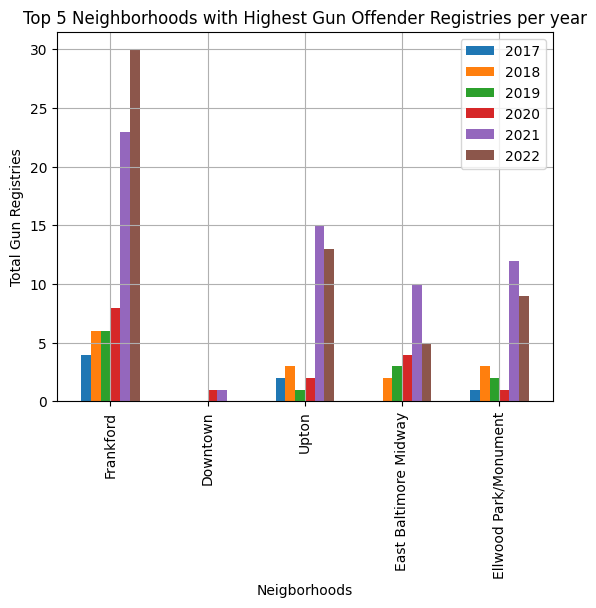

In [11]:
#Visualization of Top 5 neighborhoods with Highest Gun Offender Registry

summary_table_inc.plot(kind='bar', width=.6)
plt.xlabel('Neigborhoods')
plt.ylabel('Total Gun Registries')
plt.title('Top 5 Neighborhoods with Highest Gun Offender Registries per year')
plt.grid(True)

In [12]:
#a summary table that shows the counts by year for the bottom 5 neighborhoods
dec_5 = ['Mount Vernon', 'Broadway East', 'Sandtown-Winchester', 'Baltimore Highlands', 'Brooklyn']
summary_table_dec = pd.DataFrame(index=dec_5, columns=nei_crime['Mount Vernon'].index)
for nei in dec_5:
    summary_table_dec.loc[nei] = nei_crime[nei]
summary_table_dec['2022'] = pd.to_numeric(summary_table_dec['2022'])
summary_table_dec['2021'] = pd.to_numeric(summary_table_dec['2021'])
summary_table_dec['2020'] = pd.to_numeric(summary_table_dec['2020'])
summary_table_dec['2019'] = pd.to_numeric(summary_table_dec['2019'])
summary_table_dec['2018'] = pd.to_numeric(summary_table_dec['2018'])
summary_table_dec['2017'] = pd.to_numeric(summary_table_dec['2017'])

print(summary_table_dec)

                     2017  2018  2019  2020  2021  2022
Mount Vernon            1     2     0     0     1     0
Broadway East           3     2     2     5    10     4
Sandtown-Winchester     5     4    10     8    15    20
Baltimore Highlands     0     0     1     2     1     3
Brooklyn                3     4     4     2    12    12


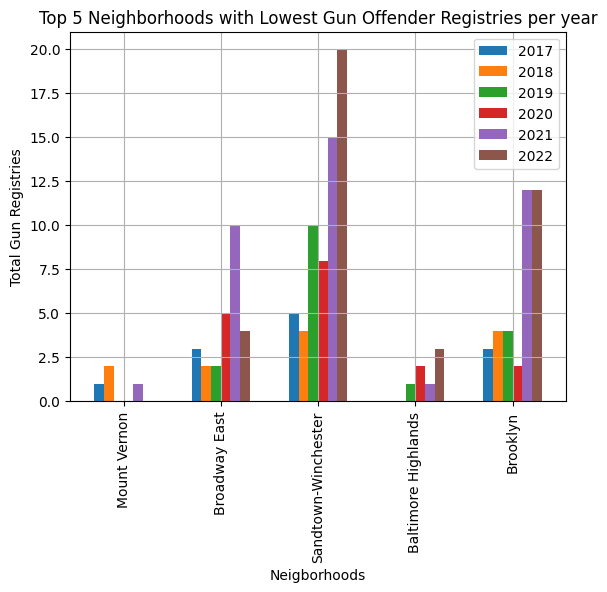

In [13]:
#Visualization of Top 5 neighborhoods with Lowest Gun Offender Registry

summary_table_dec.plot(kind='bar', width=.6)
plt.xlabel('Neigborhoods')
plt.ylabel('Total Gun Registries')
plt.title('Top 5 Neighborhoods with Lowest Gun Offender Registries per year')
plt.grid(True)

Frankford                0.689578
Downtown                -0.098251
Upton                    0.640286
East Baltimore Midway    0.378275
Ellwood Park/Monument    0.422959
dtype: float64


Mount Vernon           0.472949
Broadway East          0.585904
Sandtown-Winchester   -0.296757
Baltimore Highlands   -0.823259
Brooklyn              -0.191244
dtype: float64


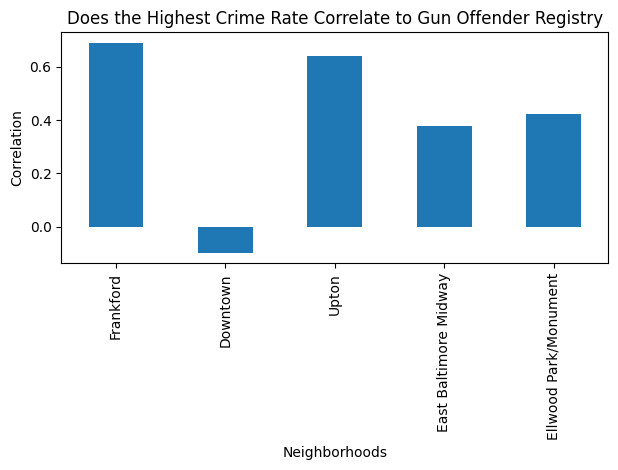

In [16]:
#see if there is any correlation between gun offender registry and crime rate in the neighborhoods above
top_corr = summary_table_inc.corrwith(top_crime_df, axis=1)
print(top_corr)
print("\n")

bot_corr = summary_table_dec.corrwith(bot_crime_df, axis = 1)
print(bot_corr)

#Visualization for top neigborhoods with crime and it's correlation with gun registry

top_corr.plot(kind='bar')
plt.title('Does the Highest Crime Rate Correlate to Gun Offender Registry')
plt.xlabel('Neighborhoods')
plt.ylabel('Correlation')
plt.tight_layout()

#For our data, we understand that gun offender registry have an a connection with
#some neighborhoods more than others

Text(0, 0.5, 'Correlation')

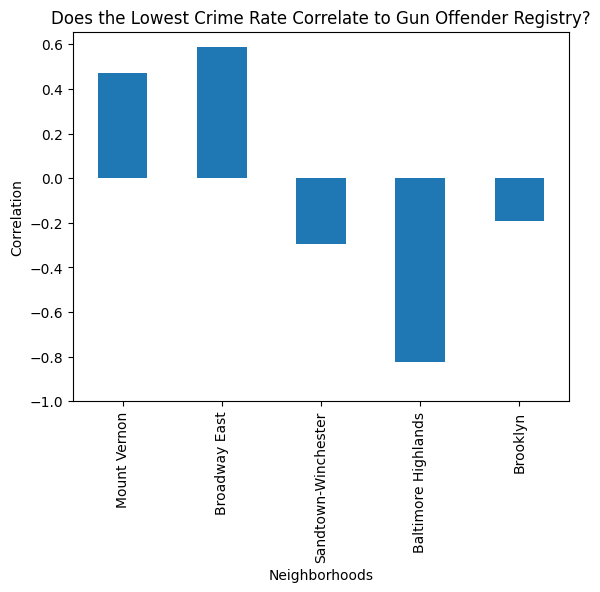

In [17]:
#Visualization for lowest neigborhoods with crime and it's correlation with gun offender registry
vp=bot_corr.plot(kind='bar')
vp.set_ylim(-1)
plt.title('Does the Lowest Crime Rate Correlate to Gun Offender Registry?')
plt.xlabel('Neighborhoods')
plt.ylabel('Correlation')

# From our data, we understand that overall there is not a strong correlation
# Between the lowest neigborhoods with crime and gun registry

Above are the correlation matricies for crime rate and gun offender registry within the top and bottom crime rate neighborhoods in baltimore from 2017-2022.

As shown in the correlation matrix, there is strong positive correlation between crime rate and gun offender registry for Frankford and Upton. A moderate positive correlation for East Baltimore Midway and Ellwood Park/Monument. And a weak negative correlation for Downtown. Overall I'd say there is a noticable correlation between high crime neighborhoods and gun offender registry. This is an interesting piece of data that would be worth looking further into.

For the bottom 5 crime rate neighborhoods Baltimore Highlands has a strong negative correlation. Mount vernon and Broadway East have a moderate positive correlation. Lastly, Brooklyn and Sandtown-Winchester have weak negative correlation. This is curious because while gun offender went up in many of these neighborhoods, crime rate went down.

There could be many factors at play. For one, there is not a lot of gun offender registry data for these neighborhoods. In addition, most of the data tends to be recent. One idea could be there has been an emphasis by police to focus on gun offenses in recent years. This would increase gun offender registry overall.

In [18]:
# You will then need to select the proper hypothesis testing method (T-test, Chi-Squared, Fischers, etc) and then create the code and run the test and interpret the results.
# we will now go from analyzing by neighborhood to analyzing total crime rate in the top neighborhoods vs total gun offender registry and total crime rate in bottom neighborhoods vs total gun offender registry

import statsmodels.api as sm

top_crime_counts = top_crime_df.values.flatten()
top_gun_offender_counts = summary_table_inc.values.flatten()
const = sm.add_constant(top_gun_offender_counts)

lm = sm.OLS(top_crime_counts, const)
res = lm.fit()

print("results for top neighborhoods")
print(res.summary())

results for top neighborhoods
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.013
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.323
Time:                        22:34:40   Log-Likelihood:                -159.95
No. Observations:                  30   AIC:                             323.9
Df Residuals:                      28   BIC:                             326.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.9035 

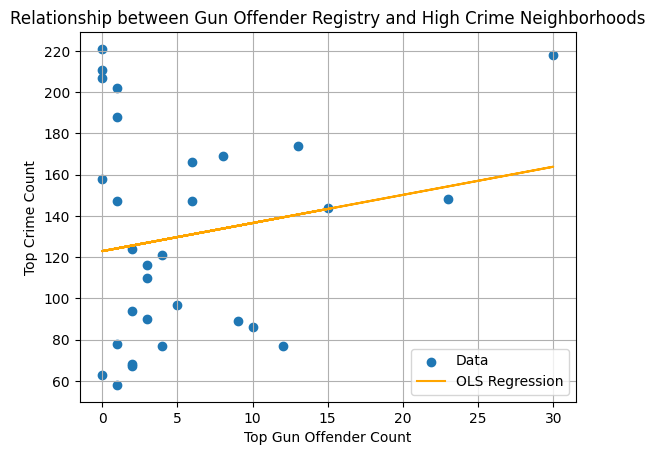

In [19]:
#Ordinary Least Squares visualization for High Crime Neigborhoods
plt.scatter(top_gun_offender_counts,top_crime_counts, label='Data')
plt.plot(top_gun_offender_counts, res.predict(const), color='orange', label='OLS Regression')

plt.title('Relationship between Gun Offender Registry and High Crime Neighborhoods')
plt.xlabel('Top Gun Offender Count')
plt.ylabel('Top Crime Count')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
bot_crime_counts = bot_crime_df.values.flatten()
bot_gun_offender_counts = summary_table_dec.values.flatten()
const = sm.add_constant(bot_gun_offender_counts)

lm = sm.OLS(bot_crime_counts, const)
res = lm.fit()

print("results for bottom neighborhoods")
print(res.summary())

results for bottom neighborhoods
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     14.87
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           0.000617
Time:                        22:34:46   Log-Likelihood:                -154.65
No. Observations:                  30   AIC:                             313.3
Df Residuals:                      28   BIC:                             316.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.42

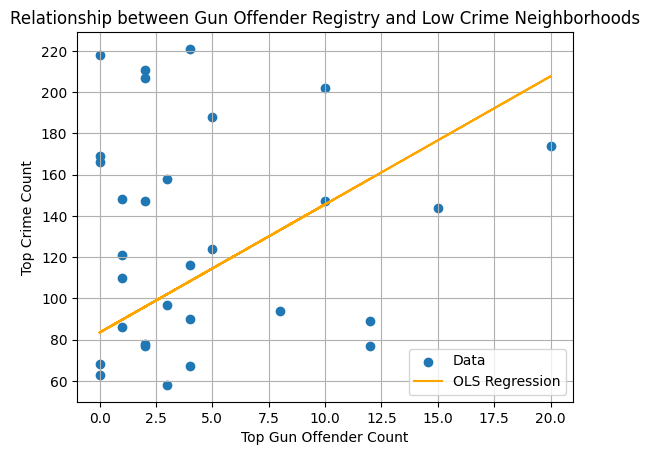

In [21]:
#Ordinary Least Squares visualization for Low Crime Neigborhoods
plt.scatter(bot_gun_offender_counts,top_crime_counts, label='Data')
plt.plot(bot_gun_offender_counts, res.predict(const), color='orange', label='OLS Regression')

plt.title('Relationship between Gun Offender Registry and Low Crime Neighborhoods')
plt.xlabel('Top Gun Offender Count')
plt.ylabel('Top Crime Count')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#combined test
all_crime_counts = np.concatenate([top_crime_counts, bot_crime_counts])
all_gun_offender_counts = np.concatenate([top_gun_offender_counts, bot_gun_offender_counts])

const = sm.add_constant(all_gun_offender_counts)
lm = sm.OLS(all_crime_counts, const)
res = lm.fit()

print("results for all neighborhoods")
print(res.summary())

results for all neighborhoods
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     8.505
Date:                Wed, 20 Dec 2023   Prob (F-statistic):            0.00503
Time:                        22:34:51   Log-Likelihood:                -318.42
No. Observations:                  60   AIC:                             640.8
Df Residuals:                      58   BIC:                             645.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.4633 

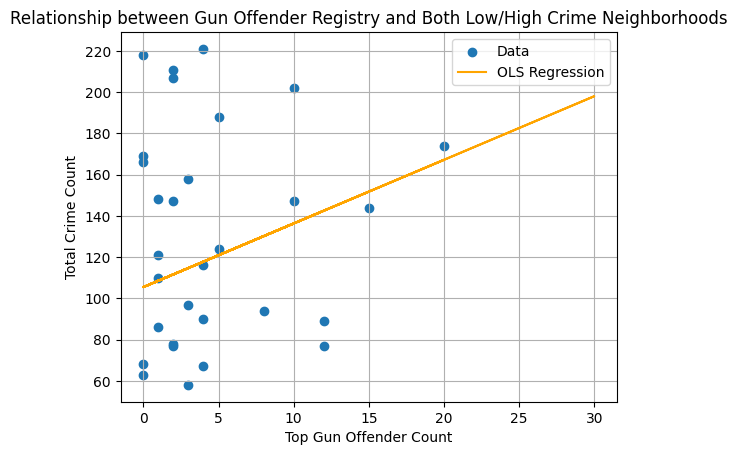

In [23]:
#Ordinary Least Squares visualization for High/Low Crime Neigborhoods
plt.scatter(bot_gun_offender_counts,top_crime_counts, label='Data')
const = sm.add_constant(all_gun_offender_counts)
plt.plot(all_gun_offender_counts, res.predict(const), color='orange', label='OLS Regression')

plt.title('Relationship between Gun Offender Registry and Both Low/High Crime Neighborhoods')
plt.xlabel('Top Gun Offender Count')
plt.ylabel('Total Crime Count')
plt.legend()
plt.grid(True)
plt.show()

Our objective is to find if gun offender registry has a linear relationship on the top and bottom crime count neighborhoods in Baltimore from 2017-2022.

A linear regression model is a good way to test the relationship between two quantitative variables such as crime count and gun offender count.

Through the summary we are also able to see the p-value for both the top and bottom neighborhoods.

For the top neighborhoods the p-value is .323 which is greater than .05. This means there was no statistically signficant effect of gun offender registry on crime rate within these neighborhoods from 2017-2022.

For the bottom neighborhoods the p-value is .001 which is less than .05. This means there was a statistically signficiant effect of gun offender registry on crime rate within these neighborhoods from 2017-2022.

When we combine the data we get a p-value of .005 which is less than .05. This means there was a statistically signficiant effect of gun offender registry on crime rate within these neighborhoods from 2017-2022.

For all three results the R-squared value was relatively low. This means that the variability in crime counts cannot be explained by our linear relationship founded above.

Based on these findings we reject our null hypothesis that Gun offender registry has no significant effect on crime rate within a the (combined) top and bottom crime rate neighborhoods from 2017-2022.

In [24]:
# We want to know how Gun Offender Registrations have changed over the years(2017-2022)
nei_df

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,...,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,GlobalID
400,1.417833e+06,595535.451767,401,22-0922,2022-12-21 00:00:00+00:00,2023/04/05 00:00:00+00,Griffith,Trahern,NaN,1994/03/06 00:00:00+00,...,Baltimore,Md,21201.0,Central,123.0,Upton,39.3013,-76.6272,"(39.3013,-76.6272)",8d1c4360-5a5b-4e35-9e2f-dde3e2ecf1f7
402,1.414116e+06,597960.929033,403,22-0920,2022-12-21 00:00:00+00:00,2023/06/07 00:00:00+00,Moore,Dontray,NaN,1990/03/31 00:00:00+00,...,Baltimore,Md,21217.0,Western,734.0,Sandtown-Winchester,39.3080,-76.6403,"(39.308,-76.6403)",eeed7256-bc21-4a42-9648-4e40dd3ead72
406,1.418514e+06,594955.465160,407,22-0916,2022-12-20 00:00:00+00:00,2022/12/20 00:00:00+00,Weems,Marvin,NaN,1978/02/09 00:00:00+00,...,Baltimore,Md,21201.0,Central,123.0,Upton,39.2997,-76.6248,"(39.2997,-76.6248)",e067d17b-6085-4162-8a2e-70d76455132c
414,1.418371e+06,595355.537728,415,22-0908,2022-12-20 00:00:00+00:00,2023/01/10 00:00:00+00,Mceachern,Gerald,NaN,2001/08/13 00:00:00+00,...,Baltimore,Md,21201.0,Central,123.0,Upton,39.3008,-76.6253,"(39.3008,-76.6253)",68e64db1-e9e9-45f7-b41e-063b316c2e68
437,1.443660e+06,608620.799150,438,22-0885,2022-12-12 00:00:00+00:00,2023/06/07 00:00:00+00,Miles,Harvey,NaN,1993/10/03 00:00:00+00,...,Baltimore,Md,21206.0,Northeast,444.0,Frankford,39.3369,-76.5357,"(39.3369,-76.5357)",ffbcc50c-18ad-44f2-93fb-06f8f793aac8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,1.425588e+06,569307.053820,3447,10-0238,2021-10-31 00:00:00+00:00,2021/10/31 00:00:00+00,Taylor,Walter,NaN,1981/02/10 00:00:00+00,...,Baltimore,Md,21225.0,Southern,913.0,Brooklyn,39.2292,-76.6002,"(39.2292,-76.6002)",10095f6b-225a-4faa-a6e6-44cbd7c661fe
3461,1.440296e+06,602557.500954,3462,09-0309,2021-10-31 00:00:00+00:00,2021/10/31 00:00:00+00,Dionas,Bagada,NaN,1986/03/25 00:00:00+00,...,Baltimore,Md,21206.0,Northeast,443.0,Frankford,39.3203,-76.5477,"(39.3203,-76.5477)",2f5c6a7b-d53c-47a6-b74c-f935fd774eaf
3462,1.426601e+06,571059.810119,3463,09-0302,2021-10-31 00:00:00+00:00,2022/04/26 00:00:00+00,Gonzalez,Matthew,NaN,1985/09/10 00:00:00+00,...,Baltimore,Md,21225.0,Southern,912.0,Brooklyn,39.2340,-76.5966,"(39.234,-76.5966)",dbccfba9-2c07-4aa7-a9e9-2a700d44255a
3483,1.426431e+06,570949.792711,3484,08-0242,2021-10-31 00:00:00+00:00,2022/04/26 00:00:00+00,Golden,Randy,NaN,1989/01/28 00:00:00+00,...,Baltimore,Md,21225.0,Southern,913.0,Brooklyn,39.2337,-76.5972,"(39.2337,-76.5972)",6696e2e0-15eb-4516-b87e-c51feeac17c4


In [25]:
nei_df[nei_df['CreatedDate'].dt.year =='2017'].groupby('Neighborhood').size()

Series([], dtype: int64)

In [26]:
Neighborhood2017=nei_df[nei_df['CreatedDate'].dt.year == 2017].groupby('Neighborhood').size()
Neighborhood2022=nei_df[nei_df['CreatedDate'].dt.year == 2022].groupby('Neighborhood').size()
Percent_change=((Neighborhood2017-Neighborhood2022)/Neighborhood2017)*100
Top_5_changes = Percent_change.sort_values(ascending=True).head(5)
Top_5_changes

Neighborhood
Ellwood Park/Monument   -800.0
Frankford               -650.0
Upton                   -550.0
Brooklyn                -300.0
Sandtown-Winchester     -300.0
dtype: float64

Text(0, 0.5, 'Total count of Registries')

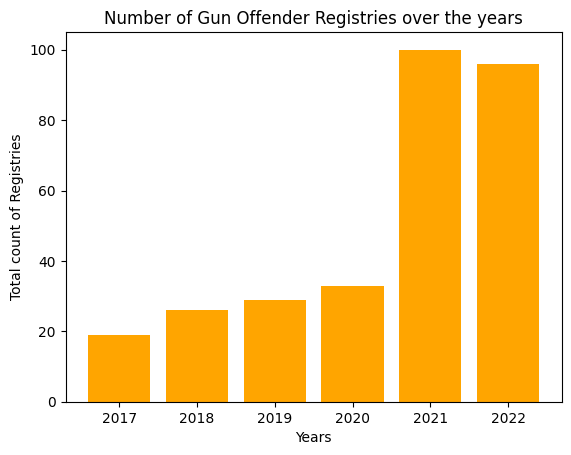

In [27]:
# GOAL: Get the total amount of Gun Offender Registries by year

#Used this line of code to extract total number of registries each year by replacing the year
nei_df[nei_df['CreatedDate'].dt.year == 2022].count()
#Created a dictonary to organize data
change_data = {'2017' : 19,
               '2018' : 26,
               '2019' : 29,
               '2020' : 33,
               '2021' : 100,
               '2022' : 96
}
#Creating a visualization to illustrate change over the years
years = list(change_data.keys())
counts = list(change_data.values())

plt.bar(years, counts, color='orange')
plt.title('Number of Gun Offender Registries over the years')
plt.xlabel('Years')
plt.ylabel('Total count of Registries')

<Axes: title={'center': 'Number of Crimes in Baltimore City per year'}, xlabel='Years', ylabel='Total count of Crimes'>

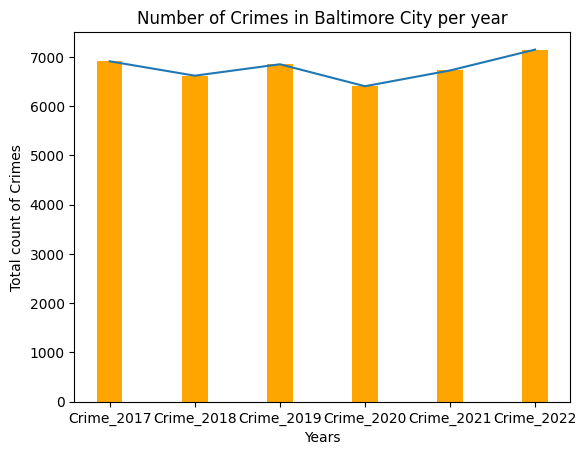

In [28]:
#part 1 values of total number of crimes per year in baltimore city
data={

       'Crime_2017': 6909,
       'Crime_2018': 6617,
       'Crime_2019': 6849,
       'Crime_2020': 6403,
       'Crime_2021': 6723,
       'Crime_2022': 7147,
}
years2 = list(data.keys())
counts2 = list(data.values())

plt.bar(years2, counts2, color='orange',width=.3)
plt.title('Number of Crimes in Baltimore City per year')
plt.xlabel('Years')
plt.ylabel('Total count of Crimes')

sns.lineplot(data)

After analyzing our data, we could see that as the years progressed, the number of Gun Offender Registries steady increased after every year. We also noticed that was a signifcant increase in Registries from the year 2020 to 2021, with the number remaining relatively high in 2022. The steady increase in Gun Offender Registries is similar to the overall crime increase from the years 2020 to 2022. We could infer that outside factors such as the economic landscape, political officers, and a global pandemic play critical roles in the overall variance.